In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "output2.xlsx"
df = pd.read_excel(file_path)

print(df.info()) 
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4358 entries, 0 to 4357
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           4358 non-null   object 
 1   Sector              4358 non-null   object 
 2   EDGAR Country Code  4358 non-null   object 
 3   Country             4358 non-null   object 
 4   1970                4358 non-null   float64
 5   1971                4358 non-null   float64
 6   1972                4358 non-null   float64
 7   1973                4358 non-null   float64
 8   1974                4358 non-null   float64
 9   1975                4358 non-null   float64
 10  1976                4358 non-null   float64
 11  1977                4358 non-null   float64
 12  1978                4358 non-null   float64
 13  1979                4358 non-null   float64
 14  1980                4358 non-null   float64
 15  1981                4358 non-null   float64
 16  1982  

In [2]:
print(df.describe())


               1970          1971          1972          1973          1974  \
count  4.358000e+03  4.358000e+03  4.358000e+03  4.358000e+03  4.358000e+03   
mean   5.466860e+00  5.475300e+00  5.685351e+00  5.960762e+00  5.957455e+00   
std    4.039377e+01  3.995296e+01  4.186290e+01  4.348285e+01  4.281481e+01   
min    1.563500e-08  1.563500e-08  1.563500e-08  1.563500e-08  1.563500e-08   
25%    2.272069e-03  2.304769e-03  2.409868e-03  2.546580e-03  2.700085e-03   
50%    4.417124e-02  4.440119e-02  4.650156e-02  4.862481e-02  5.028379e-02   
75%    6.870920e-01  7.141981e-01  7.499161e-01  7.859591e-01  8.265005e-01   
max    1.104109e+03  1.125495e+03  1.248082e+03  1.322307e+03  1.304887e+03   

               1975          1976          1977          1978          1979  \
count  4.358000e+03  4.358000e+03  4.358000e+03  4.358000e+03  4.358000e+03   
mean   5.961242e+00  6.217350e+00  6.366166e+00  6.525463e+00  6.680765e+00   
std    4.238130e+01  4.452220e+01  4.596264e+01  4.

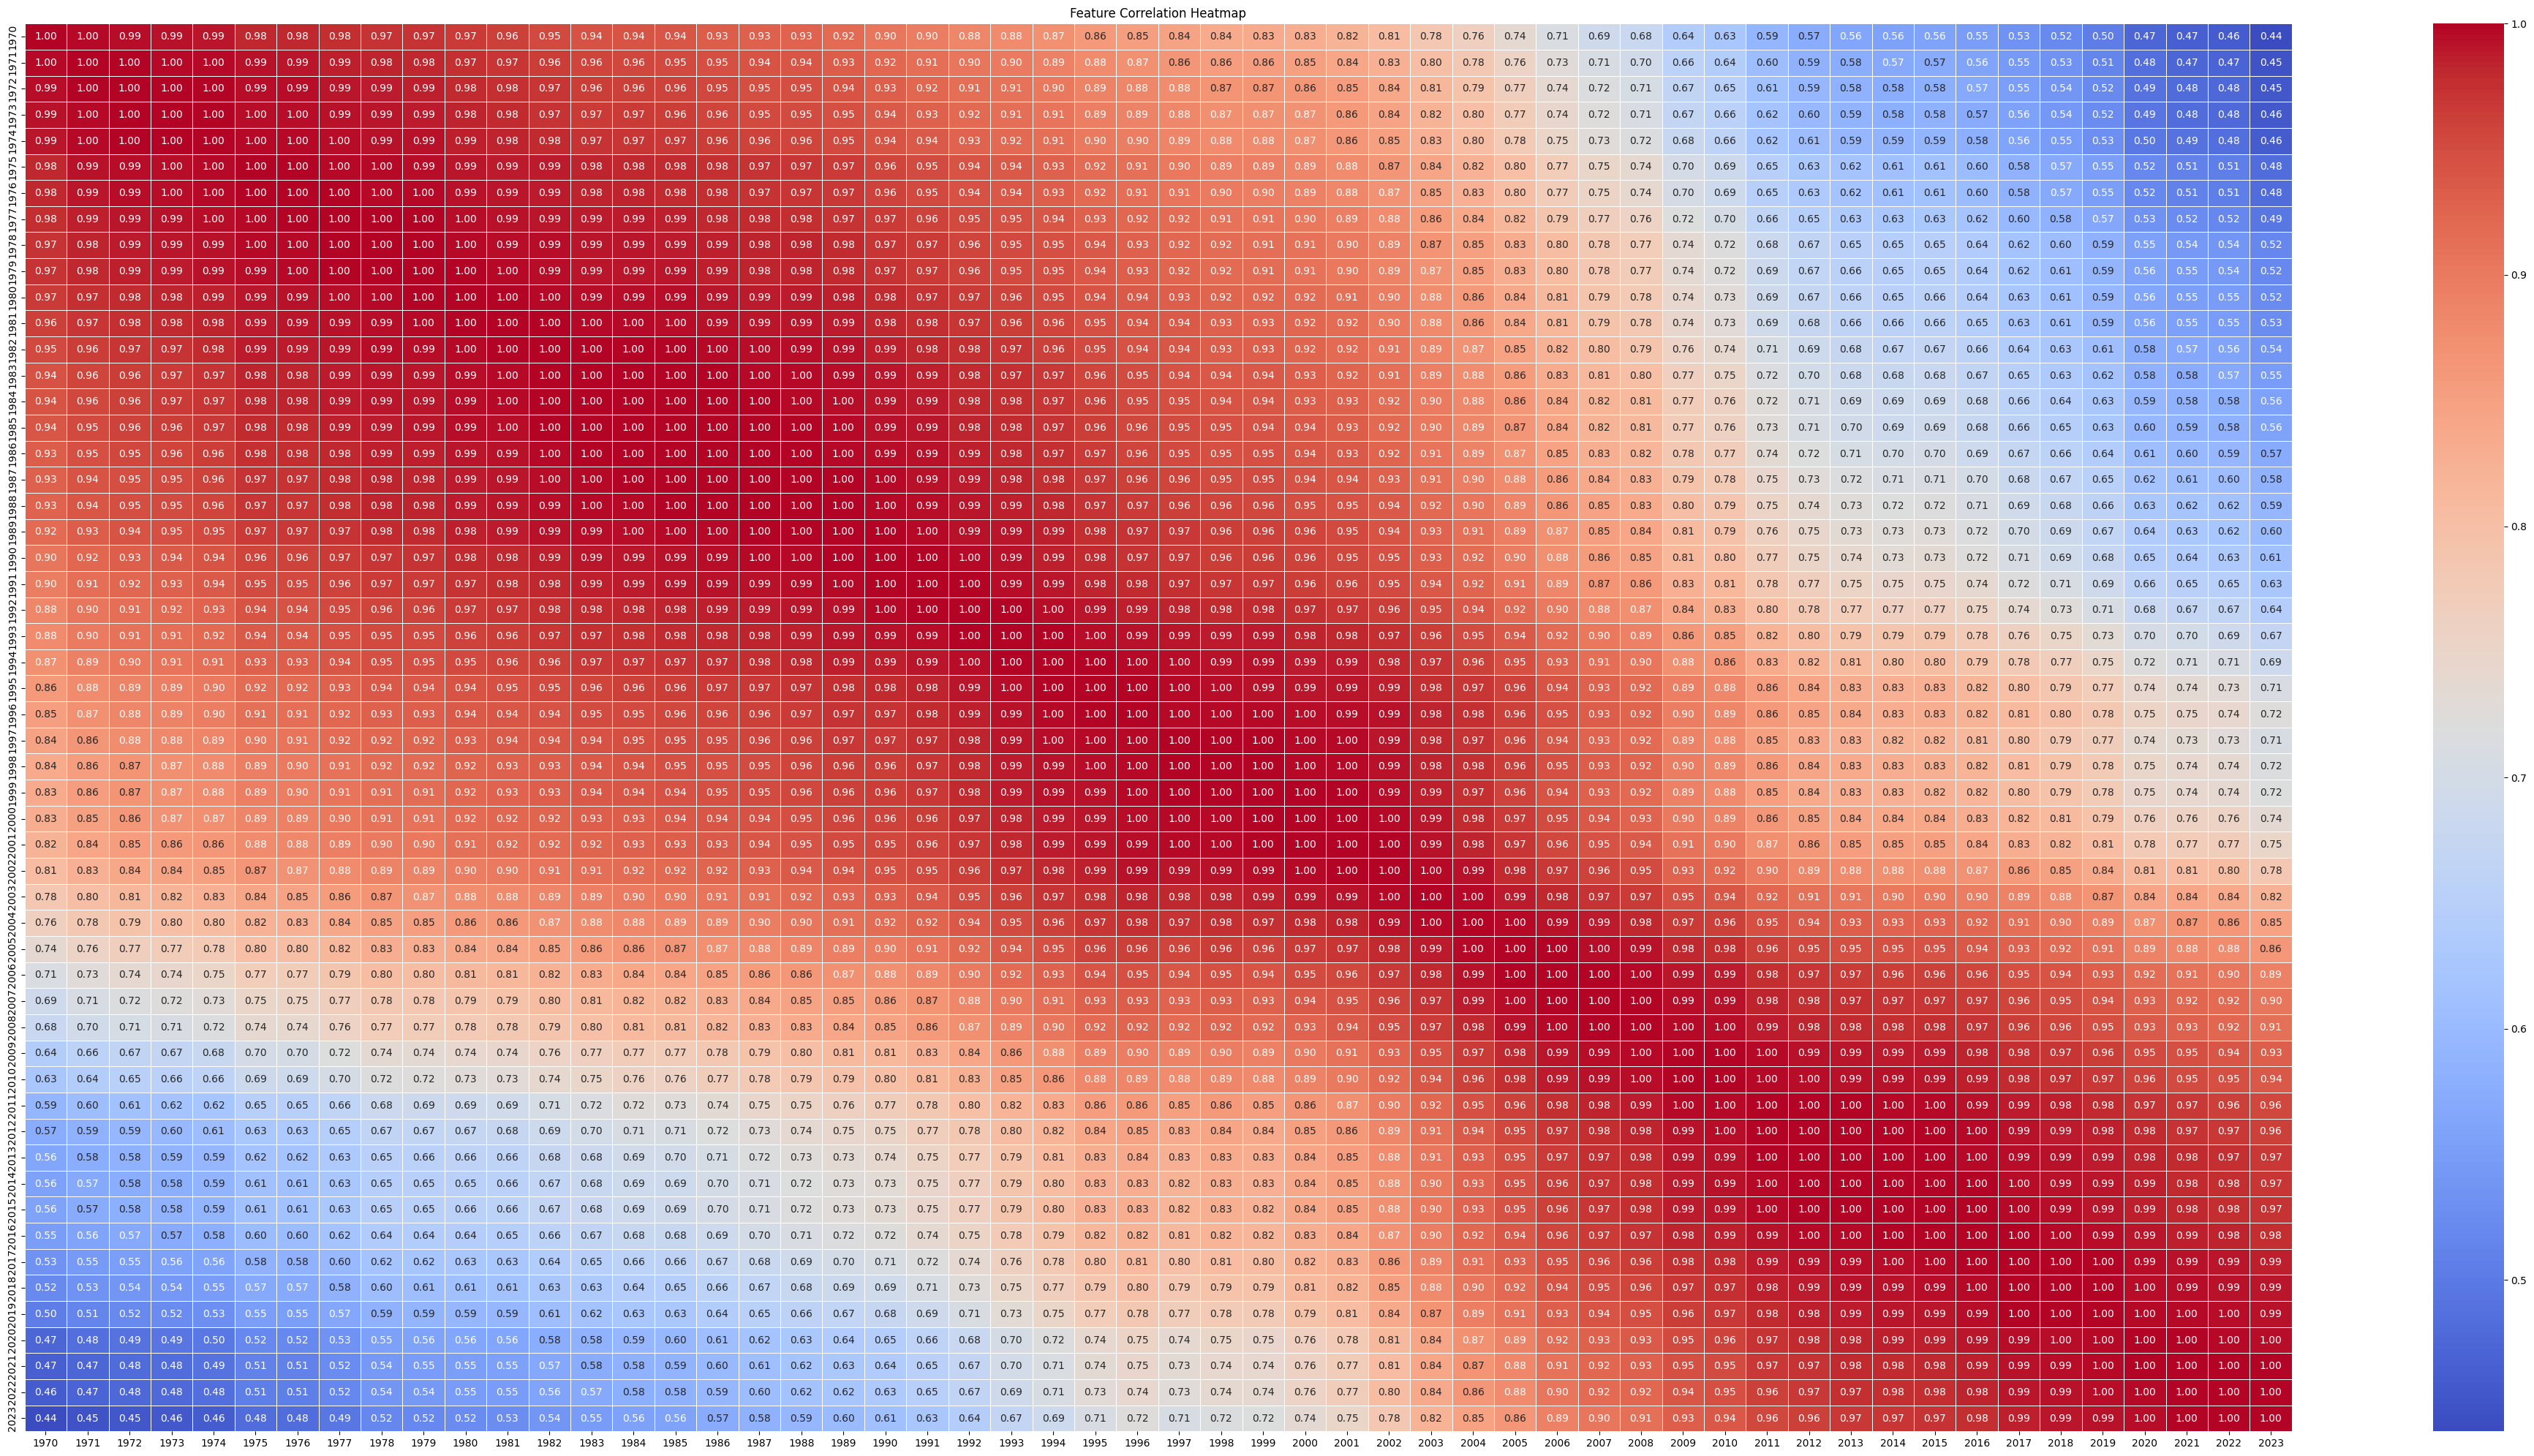

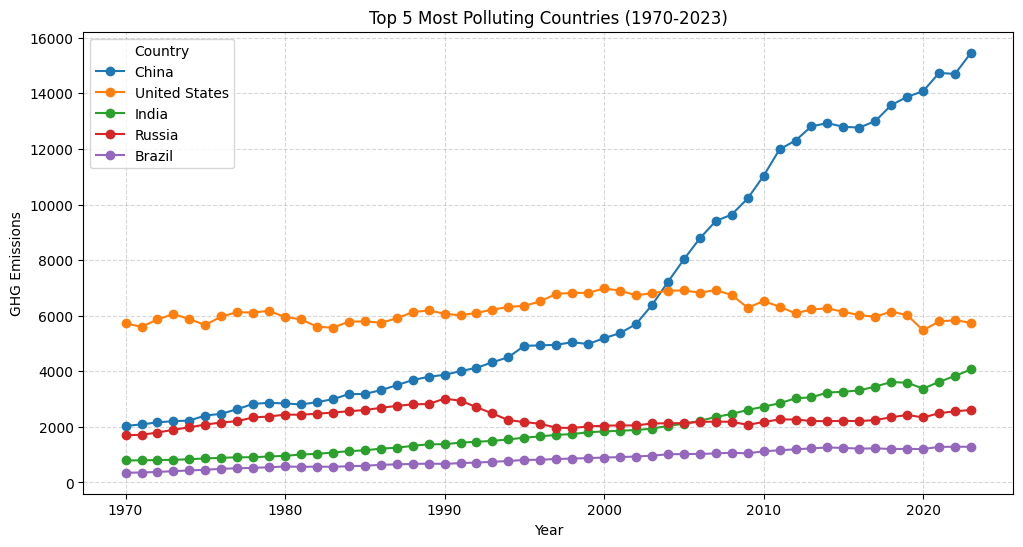

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "output2.xlsx"  
df = pd.read_excel(file_path)

# Select only numeric columns (Years)
year_columns = [col for col in df.columns if isinstance(col, int)]

# Group by country and sum emissions across all sectors
df_grouped = df.groupby("Country")[year_columns].sum()

# Get the top 5 polluting countries based on total emissions in 2023
top_5_countries = df_grouped.nlargest(5, 2023)

# Plot emissions trend for top 5 countries
plt.figure(figsize=(12, 6))
for country in top_5_countries.index:
    plt.plot(year_columns, df_grouped.loc[country], label=country, marker='o')

# Customize plot
plt.title("Top 5 Most Polluting Countries (1970-2023)")
plt.xlabel("Year")
plt.ylabel("GHG Emissions")
plt.legend(title="Country")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


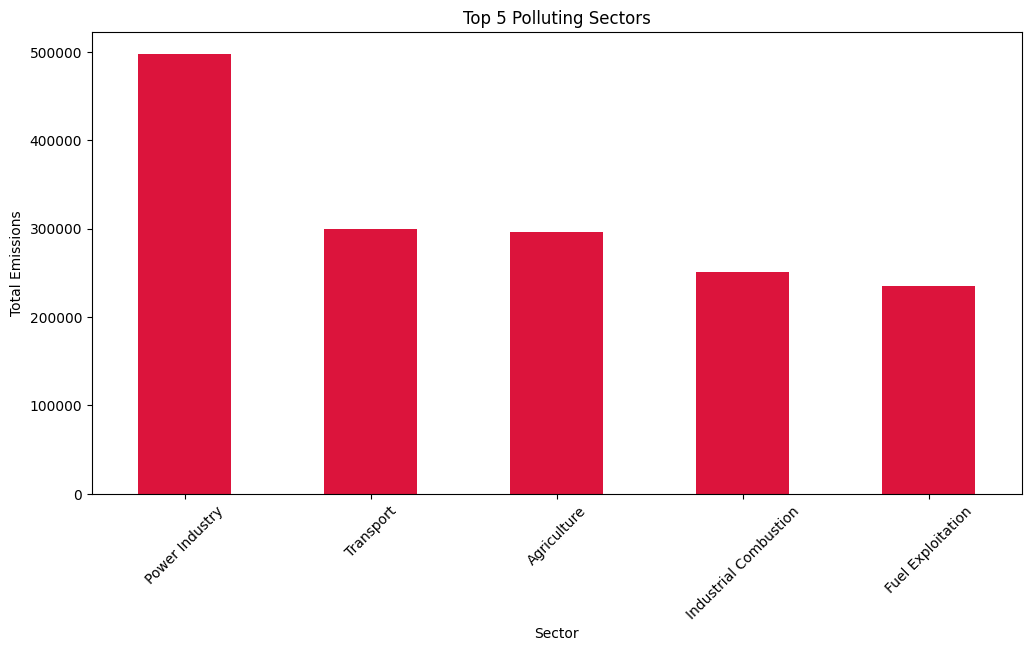

In [6]:
sector_emissions = df.groupby("Sector").sum().iloc[:, 3:].sum(axis=1).nlargest(5)

plt.figure(figsize=(12, 6))
sector_emissions.plot(kind="bar", color="crimson")
plt.title("Top 5 Polluting Sectors")
plt.xlabel("Sector")
plt.ylabel("Total Emissions")
plt.xticks(rotation=45)
plt.show()


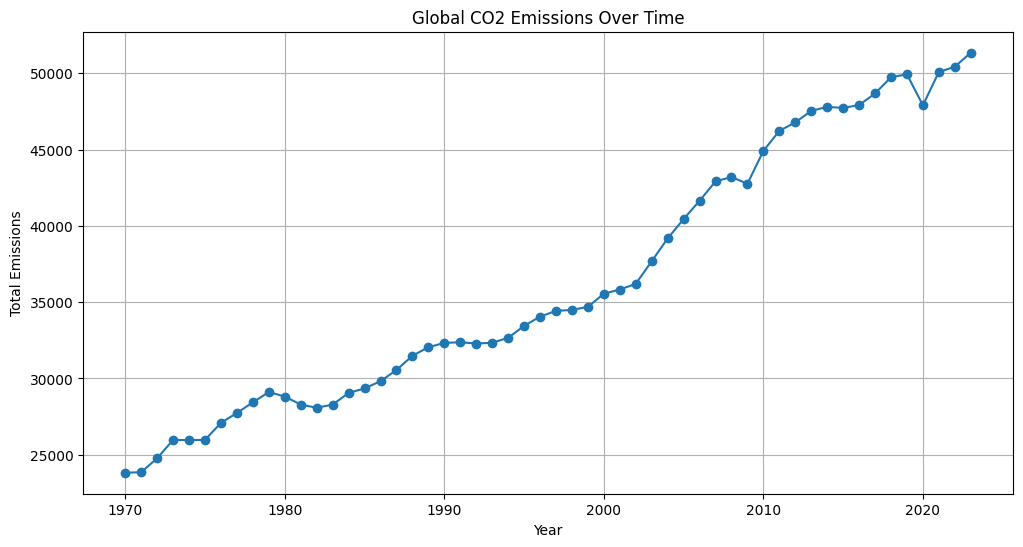

In [7]:
df_yearly = df.iloc[:, 4:].sum().reset_index()
df_yearly.columns = ['Year', 'Total Emissions']

plt.figure(figsize=(12, 6))
plt.plot(df_yearly["Year"], df_yearly["Total Emissions"], marker='o')
plt.title("Global CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.grid()
plt.show()


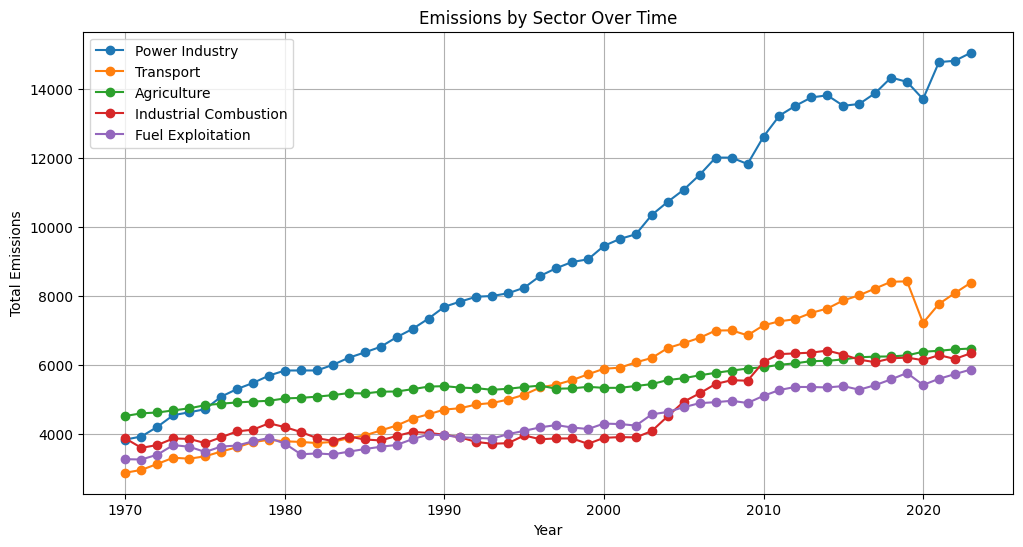

In [8]:
df_sector = df.groupby("Sector").sum().iloc[:, 3:]

plt.figure(figsize=(12, 6))
for sector in sector_emissions.index:
    plt.plot(df_sector.columns, df_sector.loc[sector], marker='o', label=sector)

plt.title("Emissions by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend()
plt.grid()
plt.show()


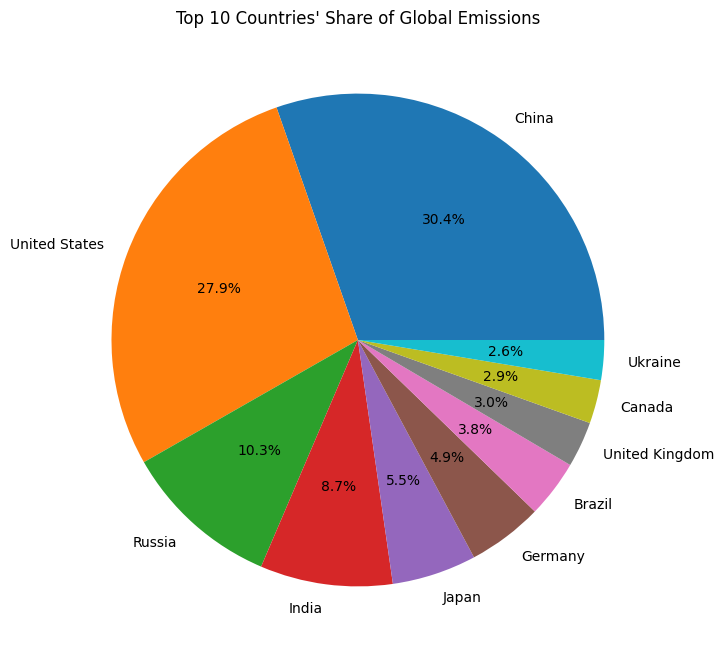

In [9]:
top_10_countries = df.groupby("Country").sum().iloc[:, 3:].sum(axis=1).nlargest(10)

plt.figure(figsize=(8, 8))
top_10_countries.plot.pie(autopct="%1.1f%%", colormap="tab10")
plt.title("Top 10 Countries' Share of Global Emissions")
plt.ylabel("")
plt.show()
